# Book Market Intelligence System: Web Scraping & Data Analysis

This project demonstrates web scraping, data cleaning, and exploratory data analysis using Python.

The objective was to extract raw book data from a website and convert it into structured insights for analysis.



## Importing Required Libraries

- requests → To send HTTP requests and fetch webpage content.
- BeautifulSoup → To parse and extract data from HTML.
- pandas → To store and manipulate structured data.
- time → To add delay between requests (ethical scraping).


In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time


## Testing Website Access

Before scraping multiple pages, I tested a single page to ensure the website was accessible and returning a valid response (status code 200).


In [18]:
url = "http://books.toscrape.com/catalogue/page-1.html"

response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")

print("Status Code:", response.status_code)


Status Code: 200


## Inspecting and Extracting Book Details

I inspected the HTML structure of the webpage and identified relevant tags and classes for:
- Title
- Price
- Rating
- Availability

This step ensures accurate data extraction.




In [17]:
books = soup.find_all("article", class_="product_pod")

first_book = books[0]

title = first_book.h3.a["title"]
price = first_book.find("p", class_="price_color").text
availability = first_book.find("p", class_="instock availability").text.strip()
rating = first_book.p["class"][1]

print("Title:", title)
print("Price:", price)
print("Availability:", availability)
print("Rating:", rating)


Title: Frankenstein
Price: Â£38.00
Availability: In stock
Rating: Two


## Extracting All Books From a Page

I looped through all book containers on the page and extracted required information.
The extracted data was stored in a list and converted into a pandas DataFrame.


In [ ]:
data = []

for book in books:
    title = book.h3.a["title"]
    price = book.find("p", class_="price_color").text
    availability = book.find("p", class_="instock availability").text.strip()
    rating = book.p["class"][1]

    data.append([title, price, rating, availability])

df = pd.DataFrame(data, columns=["Title", "Price", "Rating", "Availability"])

df.head()


,Title,Price,Rating,Availability
0,A Light in the Attic,Â£51.77,Three,In stock
1,Tipping the Velvet,Â£53.74,One,In stock
2,Soumission,Â£50.10,One,In stock
3,Sharp Objects,Â£47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,Â£54.23,Five,In stock


## Handling Pagination

The website contains 50 pages.
I dynamically modified the page number in the URL using a loop to scrape data from all pages.

A 1-second delay was added between requests to prevent overloading the server.


In [ ]:
all_books = []

for page in range(1, 51):

    print(f"Scraping Page {page}...")

    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    books = soup.find_all("article", class_="product_pod")

    for book in books:
        title = book.h3.a["title"]
        price = book.find("p", class_="price_color").text
        availability = book.find("p", class_="instock availability").text.strip()
        rating = book.p["class"][1]

        all_books.append([title, price, rating, availability])

    time.sleep(1)

final_df = pd.DataFrame(all_books, columns=["Title", "Price", "Rating", "Availability"])

final_df.head()


Scraping Page 1...
Scraping Page 2...
Scraping Page 3...
Scraping Page 4...
Scraping Page 5...
Scraping Page 6...
Scraping Page 7...
Scraping Page 8...
Scraping Page 9...
Scraping Page 10...
Scraping Page 11...
Scraping Page 12...
Scraping Page 13...
Scraping Page 14...
Scraping Page 15...
Scraping Page 16...
Scraping Page 17...
Scraping Page 18...
Scraping Page 19...
Scraping Page 20...
Scraping Page 21...
Scraping Page 22...
Scraping Page 23...
Scraping Page 24...
Scraping Page 25...
Scraping Page 26...
Scraping Page 27...
Scraping Page 28...
Scraping Page 29...
Scraping Page 30...
Scraping Page 31...
Scraping Page 32...
Scraping Page 33...
Scraping Page 34...
Scraping Page 35...
Scraping Page 36...
Scraping Page 37...
Scraping Page 38...
Scraping Page 39...
Scraping Page 40...
Scraping Page 41...
Scraping Page 42...
Scraping Page 43...
Scraping Page 44...
Scraping Page 45...
Scraping Page 46...
Scraping Page 47...
Scraping Page 48...
Scraping Page 49...
Scraping Page 50...


,Title,Price,Rating,Availability
0,A Light in the Attic,Â£51.77,Three,In stock
1,Tipping the Velvet,Â£53.74,One,In stock
2,Soumission,Â£50.10,One,In stock
3,Sharp Objects,Â£47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,Â£54.23,Five,In stock


In [ ]:
final_df.to_csv("books_data.csv", index=False)

print("Data saved successfully!")
print("Total Books Scraped:", len(final_df))


Data saved successfully!
Total Books Scraped: 1000


## Data Cleaning and Preprocessing

- Removed currency symbol (£) from price column.
- Converted price from string to float.
- Converted categorical rating (One, Two, etc.) into numerical values (1–5).

This step prepares the data for analysis.


In [ ]:
final_df["Price"] = final_df["Price"].str.replace(r"[^0-9.]", "", regex=True)

final_df["Price"] = final_df["Price"].astype(float)

final_df.head()


,Title,Price,Rating,Availability
0,A Light in the Attic,51.77,Three,In stock
1,Tipping the Velvet,53.74,One,In stock
2,Soumission,50.10,One,In stock
3,Sharp Objects,47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock


In [ ]:
rating_map = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}

final_df["Rating"] = final_df["Rating"].map(rating_map)

final_df.head()


,Title,Price,Rating,Availability
0,A Light in the Attic,51.77,3,In stock
1,Tipping the Velvet,53.74,1,In stock
2,Soumission,50.10,1,In stock
3,Sharp Objects,47.82,4,In stock
4,Sapiens: A Brief History of Humankind,54.23,5,In stock


## Exploratory Data Analysis

Performed statistical analysis to understand:
- Total number of books
- Average price
- Highest and lowest price
- Rating distribution

This helps identify patterns in pricing and product quality.


In [ ]:
print("Total Books:", len(final_df))
print("Average Price:", final_df["Price"].mean())
print("Highest Price:", final_df["Price"].max())
print("Lowest Price:", final_df["Price"].min())
print("Average Rating:", final_df["Rating"].mean())


Total Books: 1000
Average Price: 35.07035
Highest Price: 59.99
Lowest Price: 10.0
Average Rating: 2.923


In [ ]:
final_df["Rating"].value_counts().sort_index()


,count
Rating,
1,226
2,196
3,203
4,179
5,196


## Data Visualization

Created visualizations to better understand:
- Distribution of book ratings
- Distribution of prices

Graphs make insights more interpretable and meaningful.


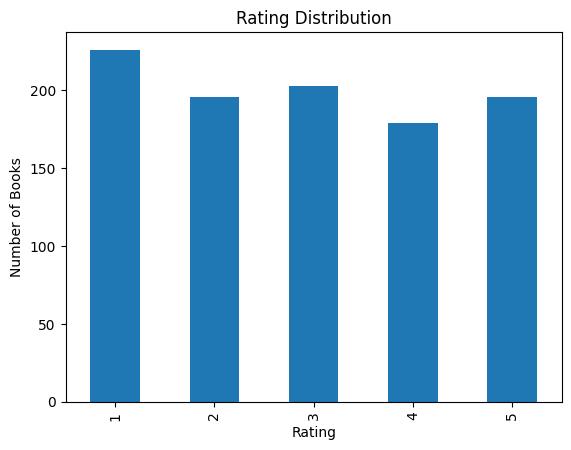

In [ ]:
import matplotlib.pyplot as plt

final_df["Rating"].value_counts().sort_index().plot(kind="bar")

plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Books")
plt.show()


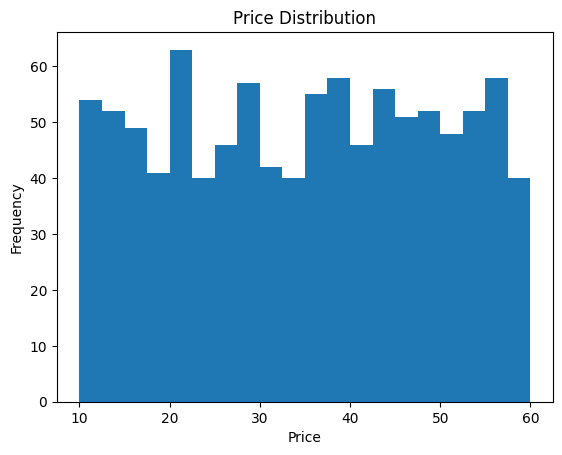

In [ ]:
final_df["Price"].plot(kind="hist", bins=20)

plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()


In [ ]:
final_df.sort_values("Price", ascending=False).head(10)


,Title,Price,Rating,Availability
648,The Perfect Play (Play by Play #1),59.99,3,In stock
617,Last One Home (New Beginnings #1),59.98,3,In stock
860,Civilization and Its Discontents,59.95,2,In stock
560,The Barefoot Contessa Cookbook,59.92,5,In stock
366,The Diary of a Young Girl,59.90,3,In stock
657,The Bone Hunters (Lexy Vaughan & Steven Macaul...,59.71,3,In stock
133,Thomas Jefferson and the Tripoli Pirates: The ...,59.64,1,In stock
387,Boar Island (Anna Pigeon #19),59.48,3,In stock
549,The Man Who Mistook His Wife for a Hat and Oth...,59.45,4,In stock
393,The Improbability of Love,59.45,1,In stock


## Business Insights

- Identified the most common rating.
- Analyzed average price based on rating.
- Found top premium-priced books.

These insights demonstrate how raw web data can support market analysis.


In [16]:

most_common_rating = final_df["Rating"].value_counts().idxmax()
print("Most Common Rating:", most_common_rating)

avg_price_by_rating = final_df.groupby("Rating")["Price"].mean()
print("\nAverage Price by Rating:\n", avg_price_by_rating)

print("\nTop 5 Most Expensive Books:")
print(final_df.sort_values("Price", ascending=False).head(5)[["Title", "Price"]])


Most Common Rating: 1

Average Price by Rating:
 Rating
1    34.561195
2    34.810918
3    34.692020
4    36.093296
5    35.374490
Name: Price, dtype: float64

Top 5 Most Expensive Books:
                                  Title  Price
648  The Perfect Play (Play by Play #1)  59.99
617   Last One Home (New Beginnings #1)  59.98
860    Civilization and Its Discontents  59.95
560      The Barefoot Contessa Cookbook  59.92
366           The Diary of a Young Girl  59.90
